In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "-1"
import gym
import gin
import numpy as np
import random
from vectorincrement import load_env
from vectorincrement.observation_encoder import KerasEncoderWrapper, get_obss_states
from gym.wrappers import TimeLimit
from matplotlib import pyplot as plt
import tensorflow as tf

In [2]:
gin.enter_interactive_mode()
gin.parse_config_file('config/cartpole_linear.gin')

In [3]:
env = gym.make('VectorIncrement-v0')

In [4]:
env = load_env("VectorIncrement-v0", obs_scaler=0.1)

Make environment VectorIncrement-v0 None {}


In [5]:
env.reset()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [6]:
env.step(0)

(array([0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ], dtype=float32),
 0.0,
 False,
 {})

In [2]:
gin.enter_interactive_mode()

# just loading parameters, cannot really load the file because the dimension might be different
gin.parse_config_file('config/ve5_nonlinear.gin')
#gin.bind_parameter('observation_encoder.KerasEncoder.model_callable', None)

In [3]:
model_filename = gin.query_parameter('observation_encoder.KerasEncoder.model_filename')

In [4]:
env = load_env()
env = KerasEncoderWrapper(env, model_filename=model_filename)

Make environment VectorIncrement-v0 None {}
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
env

<KerasEncoderWrapper<ObservationScaleWrapper<TimeLimit<VectorIncrementEnvironment<VectorIncrement-v0>>>>>

In [6]:
def predict_states_from_obs(env, n_episodes=100, batch_size=256, epochs=100):
    """Get states/observations from the env on a random policy, fit a linear model and plot the loss."""

    obss, states = get_obss_states(env, n_episodes)
    m = tf.keras.Sequential([tf.keras.layers.Dense(states.shape[1], input_shape=(obss.shape[1],),
                                           activation=None)])
    m.compile('adam', 'mse')
    h = m.fit(obss, states, batch_size=batch_size, epochs=epochs, verbose=0)

    plt.title(f"state~model(obs), env={env} steps={len(obss)}")
    plt.plot(h.history['loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.yscale('log')
    plt.show()

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


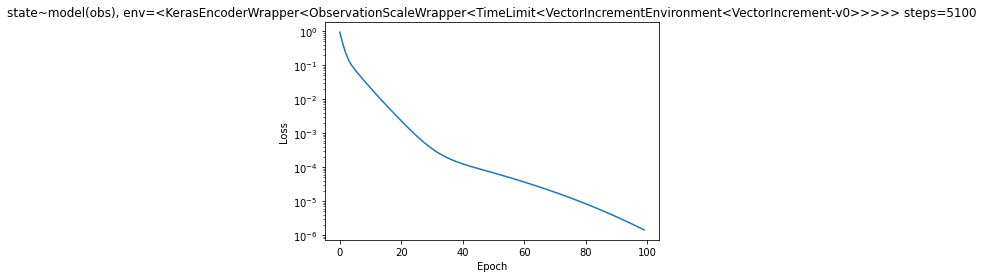

In [7]:
predict_states_from_obs(env=env, epochs=100, n_episodes=100)

#### Problem: encoder is too linear